## **AI ART ANALYSIS**

### In this project we will analyze different tweets regarding AI art, use sentiment analysis and create a Tableau dashboard in the end.
#### **Our steps:** 
1. Use snscrape to scrape the tweets that we want. We will scrape all tweets since 01-01-2020 to present day.
2. Clean the dataframes we got.
3. Run sentiment analysis on the tweets themselves. 
4. Explore our data and gain insights. 
5. Visualize our data using a Tableau dashbaord.

-------------------------------------------------------------------------------------------------------------------------------------------

### Step 1: Scrape the tweets we need.

In [2]:
# first off we import the libraries we need for now: 

import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint 
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

##### Let's see what kind of data we can get from a certain tweet, I just rolled with Fyodor Dostoevsky.

In [2]:
query = "fyodor dostoevsky"

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    pprint.pprint(vars(tweet))
    break

{'card': None,
 'cashtags': None,
 'conversationId': 1626844585962921984,
 'coordinates': None,
 'date': datetime.datetime(2023, 2, 18, 7, 22, 29, tzinfo=datetime.timezone.utc),
 'hashtags': ['wip',
              'fyolai',
              'bsdtwt',
              'bungosd',
              'fyodor',
              'art',
              'fyodordostoevsky',
              'Nikolai'],
 'id': 1626844585962921984,
 'inReplyToTweetId': None,
 'inReplyToUser': None,
 'lang': 'en',
 'likeCount': 0,
 'links': None,
 'media': [Photo(previewUrl='https://pbs.twimg.com/media/FpO2h4JXgAANnJQ?format=jpg&name=small',
                 fullUrl='https://pbs.twimg.com/media/FpO2h4JXgAANnJQ?format=jpg&name=large',
                 altText=None)],
 'mentionedUsers': None,
 'place': None,
 'quoteCount': 0,
 'quotedTweet': None,
 'rawContent': '#wip what are you gonna do now? kill me? 🥱🥱\n'
               '\n'
               ' #fyolai #bsdtwt #bungosd #fyodor #art #fyodordostoevsky '
               '#Nikolai https://

##### Now that we know what kind of variables we can get, we can choose what we need. But before that let me put some things in perspective.
##### My initial goal was to analyze the Midjourney tweets since suddenly all of it's art was all over my social media. But giving it some thought, I decided to also check other AI art platforms such as: Jasper Art, Nightcafe, Dall E-2 and stable diffusion. 

#### **Midjourney**

In [3]:
query = "(from:#midjourney)since:2020-01-01"
midjourney = []

for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    midjourney.append([tweet.date, tweet.user.username, tweet.rawContent, tweet.hashtags, tweet.lang, tweet.place, tweet.sourceLabel, tweet.viewCount])


midjourney_df = pd.DataFrame(midjourney, columns=['Date', 'User', 'Tweet', 'hashtags', 'language', 'place', 'source', 'views'])
midjourney_df

,Date,User,Tweet,hashtags,language,place,source,views
0,2023-02-18 07:10:41+00:00,GRIBBUB,From my original to #deez #AI generated images...,"[deez, AI, AIArtwork, AiArtSociety, midjourney]",en,None,Twitter Web App,10.0
1,2023-02-18 07:08:27+00:00,Mayurgta,Create a Tweet from a new Discord message.\n\n...,"[roses, richmondva, traitor, manchesterunited,...",en,None,Mayur Gupta,42.0
2,2023-02-18 06:55:05+00:00,next_prompt,“Fashion photography of a anthropomorphic gira...,"[MidJourney, AiArtwork]",en,None,MidJourney auto post,20.0
3,2023-02-18 05:57:18+00:00,khoiv_art,Supervillain from Indonesia ... #midjourney \n...,[midjourney],in,None,Twitter Web App,4.0
4,2023-02-18 05:26:19+00:00,slopaxo,HEAD to our YouTube channel called #SLOPAXO wh...,"[SLOPAXO, ai, aiart, midjourney]",en,None,Twitter for iPhone,54.0
...,...,...,...,...,...,...,...,...
14436,2022-03-16 21:34:38+00:00,williamngan,"Trying out #midjourney \n\n""The following list...",[midjourney],en,None,Twitter Web App,NaN
14437,2022-03-16 19:21:15+00:00,mattdesl,"pages from Cartographer's Quarterly, 1973 – 19...","[midjourney, ai, generative]",en,None,Twitter Web App,NaN
14438,2022-03-14 23:23:43+00:00,motionphi,"""Sad emo kid from ancient Egypt"" - generated w...","[midjourney, generative, ganart]",en,None,Twitter Web App,NaN
14439,2022-03-14 12:31:07+00:00,mattdesl,polaroids from the edge —\n\n#midjourney #gene...,"[midjourney, generative]",en,None,Twitter Web App,NaN


#### **Jasper Art**

In [4]:
query = "(from:#jasperart)since:2020-01-01"
jasperart = []

for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    jasperart.append([tweet.date, tweet.user.username, tweet.rawContent, tweet.hashtags, tweet.lang, tweet.place, tweet.sourceLabel, tweet.viewCount])


jasperart_df = pd.DataFrame(jasperart, columns=['Date', 'User', 'Tweet', 'hashtags', 'language', 'place', 'source', 'views'])
jasperart_df

,Date,User,Tweet,hashtags,language,place,source,views
0,2022-09-27 20:01:28+00:00,heyjasperai,We're sharing #JasperArt prompts to help other...,"[JasperArt, AI]",en,None,LaterMedia,None
1,2022-09-25 03:00:55+00:00,nsosdadpodcast,Jasper: The Incredible AI Tool That Creates Ar...,"[jasperart, jasperai, aitools]",en,None,Twitter Web App,None
2,2021-05-04 02:55:02+00:00,artSWC,Fresh off the easel is this 16” x 20” acrylic ...,"[jasper, jasperart, jasperartist, yeg, yegarti...",en,None,Twitter for iPhone,None
3,2020-10-10 17:11:32+00:00,artSWC,Spending some time out in #jasper this week to...,"[jasper, Pleinair, jasperart, jaspernationalpa...",en,None,Twitter for iPhone,None


#### **Nightcafe**

In [5]:
query = "(from:#nightcafe)since:2020-01-01"
nightcafe = []

for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    nightcafe.append([tweet.date, tweet.user.username, tweet.rawContent, tweet.hashtags, tweet.lang, tweet.place, tweet.sourceLabel, tweet.viewCount])


nightcafe_df = pd.DataFrame(nightcafe, columns=['Date', 'User', 'Tweet', 'hashtags', 'language', 'place', 'source', 'views'])
nightcafe_df

,Date,User,Tweet,hashtags,language,place,source,views
0,2023-02-18 07:27:54+00:00,pepesoliman,"""tales from all over the world in one picture,...","[aiart, nightcafe, digitalart]",en,None,Twitter for Android,8.0
1,2023-02-18 05:17:27+00:00,DarkhorseNick,"Stormbrewer Bonsai-steam clouds and lightning,...","[aiart, nightcafe, digitalart, vqganclip]",en,None,Twitter Web App,8.0
2,2023-02-18 04:44:31+00:00,SeregaL2011,A beautiful girl from a distant past - made wi...,"[aiart, nightcafe, digitalart, vqganclip]",en,None,Twitter Web App,5.0
3,2023-02-18 00:39:09+00:00,CNEWBY03,Who will separate us from the love of Christ? ...,"[aiart, nightcafe, digitalart, vqganclip]",en,None,Twitter Web App,6.0
4,2023-02-17 23:58:22+00:00,KristianISkjel,"""A View From a Broken Brooklyn Bridge - made ...","[aiart, nightcafe, digitalart]",en,None,Twitter for Android,8.0
...,...,...,...,...,...,...,...,...
7183,2020-02-20 19:26:58+00:00,CoolFMAbuja,Get to know those signs that show you're in th...,"[CoolestLoveDr, NightCafe]",en,None,Twitter Web App,NaN
7184,2020-02-19 19:27:25+00:00,CoolFMAbuja,NP || Kiss From A Rose @Seal \n\n#NightCafe wi...,"[NightCafe, oldschool, OldSchoolWednesday, Old...",en,None,Twitter Web App,NaN
7185,2020-02-17 22:39:25+00:00,CoolFMAbuja,NP || Want From Me @Ayo_4_ @doubleroscarr \n...,"[NightCafe, HumanSpiritDay, MyWayDay, RandomAc...",en,None,Twitter Web App,NaN
7186,2020-01-28 21:52:40+00:00,CoolFMKano,#NowOnAir #NightCafe #TrendyTuesday\n🎙️ @spotl...,"[NowOnAir, NightCafe, TrendyTuesday, np, Liste...",en,None,Twitter Web App,NaN


#### **Dall E-2**

In [6]:
query = "(from:#dalle2)since:2020-01-01"
dalle2 = []

for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    dalle2.append([tweet.date, tweet.user.username, tweet.rawContent, tweet.hashtags, tweet.lang, tweet.place, tweet.sourceLabel, tweet.viewCount])


dalle2_df = pd.DataFrame(dalle2, columns=['Date', 'User', 'Tweet', 'hashtags', 'language', 'place', 'source', 'views'])
dalle2_df

,Date,User,Tweet,hashtags,language,place,source,views
0,2023-02-18 06:49:53+00:00,27aea577f17d4c4,Happy Birthday #QGIS - I've heard that you are...,"[QGIS, dalle2]",en,None,Twitter Web App,63.0
1,2023-02-17 23:53:00+00:00,pariah49634411,birds #AIArtwork #birds #WINTER #aiartcommun...,"[AIArtwork, birds, WINTER, aiartcommunity, dal...",en,None,Twitter Web App,25.0
2,2023-02-17 23:31:11+00:00,architecture_eu,From Zero to Hero: AI Art Prompts Tips to Help...,"[art, AIart, machinelearning, NFT, MLart, deep...",en,None,IFTTT,48.0
3,2023-02-17 17:19:00+00:00,pariah49634411,black.sun.rise #aiart #moon #lanscape #aiartc...,"[aiart, moon, lanscape, aiartcommunity, dalle2...",en,None,Twitter Web App,27.0
4,2023-02-17 16:31:51+00:00,MyOldNine,Discover a mind-bending journey through the un...,"[ChatGPT, DALLE2]",en,None,Twitter Web App,25.0
...,...,...,...,...,...,...,...,...
7013,2022-04-06 21:29:46+00:00,Ali_Design_1,"@ilyasut, @OpenAI This is a great timing with ...",[dalle2],en,None,Twitter Web App,NaN
7014,2022-04-06 20:15:53+00:00,anand_bhattad,This is simply amazing!! Could anyone try chan...,"[dalle, dalle2]",en,None,Twitter Web App,NaN
7015,2022-04-06 16:08:54+00:00,mikkoimpio,Amazing work from OpenAI. I wonder how much th...,[DallE2],en,None,Twitter Web App,NaN
7016,2022-04-06 15:10:13+00:00,eturner303,Computer generated imagery from neural network...,"[openai, dalle2]",en,None,Twitter for Android,NaN


#### **Stable diffusion**

In [7]:
query = "(from:#stablediffusion)since:2020-01-01"
stable_diffusion = []

for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    stable_diffusion.append([tweet.date, tweet.user.username, tweet.rawContent, tweet.hashtags, tweet.lang, tweet.place, tweet.sourceLabel, tweet.viewCount])


stable_diffusion_df = pd.DataFrame(stable_diffusion, columns=['Date', 'User', 'Tweet', 'hashtags', 'language', 'place', 'source', 'views'])
stable_diffusion_df

,Date,User,Tweet,hashtags,language,place,source,views
0,2023-02-18 07:41:46+00:00,ErikaNat0,"prompt:""closeup of a friendly humanoid hybrid,...","[AIart, stablediffusion, prompt]",en,None,Twitter Web App,23.0
1,2023-02-18 07:41:45+00:00,ErikaNat0,"prompt:""closeup of a cool humanoid hybrid, mal...","[AIart, stablediffusion, prompt]",en,None,Twitter Web App,18.0
2,2023-02-18 07:41:45+00:00,ErikaNat0,"prompt:""closeup of a shy humanoid hybrid, beau...","[AIart, stablediffusion, prompt]",en,None,Twitter Web App,15.0
3,2023-02-18 07:41:44+00:00,ErikaNat0,"Prompt ""closeup of a powerfull humanoid, beaut...","[AIart, stablediffusion, prompt]",en,None,Twitter Web App,15.0
4,2023-02-18 07:41:44+00:00,ErikaNat0,how to go from drawing to photorealism in @pla...,"[AIart, stablediffusion, prompt]",en,None,Twitter Web App,19.0
...,...,...,...,...,...,...,...,...
9950,2022-07-22 21:37:02+00:00,dymokomi,@Ethan_smith_20 do models perform at their nat...,[stablediffusion],en,None,Twitter Web App,NaN
9951,2022-07-22 19:13:20+00:00,multimodalart,#stablediffusion is really cool - and now you ...,[stablediffusion],en,None,Twitter Web App,NaN
9952,2022-07-22 19:04:22+00:00,sureailabs,"Where I live, everything old is built from Tyn...",[stablediffusion],en,None,Twitter Web App,NaN
9953,2022-07-22 14:29:27+00:00,RenAI_NFT,Cover from a 2007 album straight out of #stabl...,"[stablediffusion, AI]",en,None,Twitter Web App,NaN


#### Now that we have our tweets let's start cleaning our dataframes

#### **Step 2: Clean the data**

##### Let's join all dataframes together so it will be easier to clean everything at once. In order to differentiate which record belongs to which query we will add a helper column.

In [8]:
midjourney_df['platform'] = 'Midjourney'
jasperart_df['platform'] = 'Jasper Art'
nightcafe_df['platform'] = 'NightCafe'
dalle2_df['platform'] = 'Dall E-2'
stable_diffusion_df['platform'] = 'Stable Diffusion'

In [9]:
# Merge all of the dataframes together into one.

tweets = pd.concat([midjourney_df, jasperart_df, nightcafe_df,dalle2_df,stable_diffusion_df], axis=0).reset_index(drop=True)
tweets.sample(10)

,Date,User,Tweet,hashtags,language,place,source,views,platform
8708,2022-09-04 07:17:43+00:00,CapitalF,Playing with #midjourney has been my huge new ...,[midjourney],en,None,Twitter for iPhone,NaN,Midjourney
37160,2022-09-01 08:15:05+00:00,dayz_mame,深海挺じゃなくて潜水艦の潜望鏡からの写真になってしまった・・・\n「Real Photo o...,[stablediffusion],ja,None,Twitter Web App,NaN,Stable Diffusion
21997,2023-01-29 04:00:11+00:00,comics_openai,Marvel story: story from DEADPOOL BY POSEHN &a...,"[marvel, marvelapi, dalle2, dalle, openai, tex...",en,None,dalle2_bookimgs,81.0,Dall E-2
4232,2022-11-27 13:28:46+00:00,Tim_Molloy_Art,Production Still from Season 2 of 'Legends of ...,"[midjourney, midjourneyai, aiartcommunity, AIA...",en,None,Twitter for Android,NaN,Midjourney
25474,2022-08-09 15:07:25+00:00,RAWINTHEVOID,Eleven from Stranger Things fails her driver's...,[dalle2],en,None,Twitter Web App,NaN,Dall E-2
12385,2022-07-05 17:09:21+00:00,callisto_chan,I’m slowly getting better at hashing out good ...,[midjourney],en,None,Twitter for iPhone,NaN,Midjourney
17921,2022-09-30 23:23:21+00:00,AlchemysticArts,"""Bella Goth"" - made with @NightCafeStudio ai p...","[BellaGoth, aiart, nightcafe, digitalart, thes...",en,None,Twitter for iPhone,NaN,NightCafe
174,2023-02-14 21:37:47+00:00,triflingtree,When I was in grade school we would exchange l...,[midjourney],en,None,Twitter for Android,104.0,Midjourney
5858,2022-10-22 19:01:39+00:00,image_in_1,"Hey everybody, today I'm taking a quick break ...","[ai, aiart, midjourney, midjourneyai, midjourn...",en,None,Twitter Web App,NaN,Midjourney
17902,2022-10-01 12:10:06+00:00,MoldyWarp,The Spiders from Mars by Gustave Doré and Zdzi...,"[aiart, nightcafe, digitalart, vqganclip]",pl,None,Twitter Web App,NaN,NightCafe


In [10]:
# Now that we have our tweets in one place, how many are there?

tweets.shape

(38606, 9)

#### So we have 38,606 tweets and 9 columns.

In [11]:
# How many nulls in each column ?

tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38606 entries, 0 to 38605
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Date      38606 non-null  datetime64[ns, UTC]
 1   User      38606 non-null  object             
 2   Tweet     38606 non-null  object             
 3   hashtags  38605 non-null  object             
 4   language  38606 non-null  object             
 5   place     527 non-null    object             
 6   source    38606 non-null  object             
 7   views     7826 non-null   object             
 8   platform  38606 non-null  object             
dtypes: datetime64[ns, UTC](1), object(8)
memory usage: 2.7+ MB


#### So we have null values in the columns hashtags, place & views. Let's tackle them one by now. First off, turn all places that are null to 'unknown'. Then, fill null values in views with zeros. Lastly, put an empty list in the only null value in hashtags column.

In [12]:
tweets['place'] = tweets['place'].fillna('unknown')
tweets['views'] = tweets['views'].fillna(0)
tweets['hashtags'] = tweets['hashtags'].fillna('')

In [13]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38606 entries, 0 to 38605
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Date      38606 non-null  datetime64[ns, UTC]
 1   User      38606 non-null  object             
 2   Tweet     38606 non-null  object             
 3   hashtags  38606 non-null  object             
 4   language  38606 non-null  object             
 5   place     38606 non-null  object             
 6   source    38606 non-null  object             
 7   views     38606 non-null  float64            
 8   platform  38606 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(7)
memory usage: 2.7+ MB


#### Now that we got rid of the nulls, let's transform that columns a bit before changing their data types.

In [14]:
# Extract only the date from the date column.

tweets['Date'] = tweets['Date'].dt.date
tweets['Date'].sample(10)

34936    2022-09-27
9029     2022-08-30
32649    2022-11-02
5360     2022-11-04
26109    2022-07-28
20809    2022-02-25
26125    2022-07-28
1721     2023-01-15
24061    2022-09-17
6128     2022-10-17
Name: Date, dtype: object

In [15]:
# change datatypes 

tweets['Date'] = tweets['Date'].astype('datetime64[ns]')
tweets['views'] = tweets['views'].astype('int64')
tweets.dtypes

Date        datetime64[ns]
User                object
Tweet               object
hashtags            object
language            object
place               object
source              object
views                int64
platform            object
dtype: object

##### Are there any columns or rows that we want to discard ? Actually yes.

##### Jasper AI only has 4 records, too little compared to the others. Also, the column place is mostly 'Unknown'.

In [16]:
# drop jasper records.
tweets.drop(tweets[tweets['platform'] == 'Jasper Art'].index, inplace = True)

tweets.platform.value_counts()

Midjourney          14441
Stable Diffusion     9955
NightCafe            7188
Dall E-2             7018
Name: platform, dtype: int64

In [17]:
# check and drop column place
tweets.place.value_counts(ascending=False)

unknown                                                                                                                                                            38075
Place(id='3b77caf94bfc81fe', fullName='Los Angeles, CA', name='Los Angeles', type='city', country='United States', countryCode='US')                                  33
Place(id='00d8d3fe7f31fc91', fullName='Holland, OH', name='Holland', type='city', country='United States', countryCode='US')                                          18
Place(id='1e5cb4d0509db554', fullName='Vancouver, British Columbia', name='Vancouver', type='city', country='Canada', countryCode='CA')                               18
Place(id='b7d3c12268abd20e', fullName='Düsseldorf, Germany', name='Düsseldorf', type='city', country='Germany', countryCode='DE')                                     18
                                                                                                                                                           

In [18]:
# mostly unknown so let's drop it
tweets.drop(['place'], axis=1, inplace=True)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38602 entries, 0 to 38605
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      38602 non-null  datetime64[ns]
 1   User      38602 non-null  object        
 2   Tweet     38602 non-null  object        
 3   hashtags  38602 non-null  object        
 4   language  38602 non-null  object        
 5   source    38602 non-null  object        
 6   views     38602 non-null  int64         
 7   platform  38602 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 2.7+ MB


#### Now that we fixed the data types of the columns and handled our null values, let's start with our sentiment analysis before we go for EDA.

### **Step 3: Sentiment Analysis**

##### For our sentiment analysis we will use Hugging Face roBERTa model which was trained on ~58M tweets. Since this model supports mainly english tweets we will discard any tweet that isn't in English language.

##### But before that let us make sure we have enough tweets:

In [19]:
tweets.language.value_counts(ascending=False)

en     37321
ja       636
fr       140
und       82
ca        60
es        48
fi        35
pl        33
de        31
ro        31
in        29
zh        22
tl        16
da        15
cs        14
ht        13
et        13
pt         8
no         8
sv         8
it         7
eu         4
uk         4
tr         4
cy         4
nl         4
qme        3
lt         3
hu         2
vi         1
ko         1
hi         1
is         1
Name: language, dtype: int64

### Around 97% of tweets are in English so that should be fine. Let's get to it.

In [20]:
# delete non eng tweets

tweets.drop(tweets[tweets['language'] != 'en'].index, inplace = True)

tweets.language.unique()

array(['en'], dtype=object)

### We are left with around 37k tweets. Let's start our sentiment analysis by categorizing them as Negative, Neutral and Positive.

##### Before running sentiment analysis on all of our dataframe, let's check it on a small sample:

In [59]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

def sentiment(tweet):
    
    tweet_words = []

    for word in tweet.split(' '):
        if word.startswith('@') and len(word) > 1:
            word = ""

        elif word.startswith('#'):
            word=""
        
        elif word.startswith('http'):
            word = ""

        tweet_words.append(word)

    tweet_proc = " ".join(tweet_words)

    # load model and tokenizer
    roberta = "cardiffnlp/twitter-roberta-base-sentiment"

    model = AutoModelForSequenceClassification.from_pretrained(roberta)
    tokenizer = AutoTokenizer.from_pretrained(roberta)

    labels = ['Negative', 'Neutral', 'Positive']

    # sentiment analysis
    encoded_tweet = tokenizer(tweet_proc, return_tensors='pt')
    output = model(**encoded_tweet)

    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    return labels[np.where(scores == scores.max())[0][0]]

tweet_mini = tweets.sample(1000)
tweet_mini['sentiment'] = tweet_mini['Tweet'].apply(sentiment)

##### It took around 90 minutes for it to analyze a 1000 tweet. so let's split the tweets dataframe into chunks of 1000 tweets each

In [22]:
n = 1000  #chunk row size
list_df = [tweets[i:i+n] for i in range(0,tweets.shape[0],n)]
len(list_df)

38

In [60]:
# so we have 37 groups with a 1000 tweets and an extra one with the remainder (<1000)
# we will run the analysis over each one separately and then store in a csv file in case it crahses instead of redoing it again.

i = 0

for df in list_df[0:]:
    i = i+1
    df['sentiment'] = df['Tweet'].apply(sentiment)
    df.to_csv(f'chunk_{i}.csv')

'HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /cardiffnlp/twitter-roberta-base-sentiment/resolve/main/config.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000002439C4064A0>, 'Connection to huggingface.co timed out. (connect timeout=10)'))' thrown while requesting HEAD https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/config.json
C:\Users\armon\AppData\Local\Temp\ipykernel_12172\1135442633.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['Tweet'].apply(sentiment)
C:\Users\armon\AppData\Local\Temp\ipykernel_12172\1135442633.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


##### After days (YES! literally days of waiting and crashing and picking up from where it crashed), it finally finished 
##### and we have our long awaiting 38 csv files. Let's concat them back together.

In [8]:
import glob

# List all csv files into a list

csv_files = glob.glob('*.{}'.format('csv'))
csv_files[:5]

['chunk_1.csv', 'chunk_10.csv', 'chunk_11.csv', 'chunk_12.csv', 'chunk_13.csv']

In [9]:
# concat all csv files into one dataframe:

AI_ART_2020 = pd.concat([pd.read_csv(f) for f in csv_files ], ignore_index=True)
AI_ART_2020.sample(50)

,Unnamed: 0,Date,User,Tweet,hashtags,language,source,views,platform,sentiment
33602,5552,2022-10-29,j3_so1o,Using AI to help create illustrations for my s...,"['midjourney', 'AIart']",en,Twitter Web App,0,Midjourney,Positive
802,860,2023-02-01,IntuitMachine,Our interaction changes with every new version...,"['dalle2', 'midjourney', 'stablediffusion']",en,Twitter Web App,244,Midjourney,Neutral
16075,23888,2022-09-25,pondpondzing,Britney spears from the Abyss \n#stablediffusi...,"['stablediffusion', 'dalle2', 'aiart', 'ai']",en,Twitter for Android,0,Dall E-2,Neutral
31217,38502,2022-08-07,pro_razeai,Stormtrooper From Star Wars #starwars #stormtr...,"['starwars', 'stormtrooper', 'AIart', 'stabled...",en,Twitter for Android,0,Stable Diffusion,Neutral
25347,32393,2022-11-07,promptonio,@yosi2112 A megumin from blessing to this wond...,"['replicate', 'stablediffusion']",en,Prompton,0,Stable Diffusion,Positive
10347,19116,2022-08-11,Webtalker2022,"""A portrait of an evil queen from a futuristic...","['aiart', 'nightcafe', 'digitalart']",en,Twitter Web App,0,NightCafe,Neutral
32200,4085,2022-11-29,retinafunk,Trojan horses from the hyper space tryptamine ...,"['horse', 'trojanhorse', 'dmt', 'tryptaminepal...",en,Twitter for Android,0,Midjourney,Neutral
5045,13728,2022-05-20,TomLikesRobots,"""There's something living in the old quarry, w...","['horror', 'aiart', 'midjourney']",en,Twitter Web App,0,Midjourney,Negative
13105,20890,2022-02-14,RANIABADRELDIN,"""A Heart Carved From Stone"" - made with @Night...","['aiart', 'nightcafe', 'digitalart', 'happines...",en,Twitter for iPhone,0,NightCafe,Positive
11834,1938,2023-01-10,CosmicCamera,Minted 2 more pieces in Feast so far :)\n\nFea...,"['ai', 'aiart', 'midjourney', 'midjourneyart',...",en,Twitter Web App,68,Midjourney,Positive


##### Let's drop this Unnamed column and reset our indexes:

In [11]:
AI_ART_2020.drop(['Unnamed: 0'], axis=1, inplace=True)
AI_ART_2020.reset_index()
AI_ART_2020.tail(10)

,Date,User,Tweet,hashtags,language,source,views,platform,sentiment
37311,2022-08-24,lndseer,If I post a song lyric in to an AI Image gener...,"['AIart', 'midjourney', 'craiyon']",en,Twitter Web App,0,Midjourney,Neutral
37312,2022-08-24,MidJRevelation,Then I saw an angel coming down from heaven wi...,"['Revelation', 'Apocalypse', 'AIart', 'Prophec...",en,Twitter Web App,0,Midjourney,Neutral
37313,2022-08-24,camthaman,Getting some fantastic prompts from #midjourne...,['midjourney'],en,Twitter for iPhone,0,Midjourney,Positive
37314,2022-08-24,YANGA_SKYTV,Ootembe of Oiku\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\...,"['midjourney', 'midjourneyai', 'jungle', 'digi...",en,Twitter for Android,0,Midjourney,Neutral
37315,2022-08-24,noqipon,Celestial Flower (the final one for now 😊)\n\n...,"['midjourney', 'flower', 'celestial', 'heavenl...",en,SocialChamp IO,0,Midjourney,Neutral
37316,2022-08-24,krto_deatho,💥This is Project metaverse where photos like f...,"['midjourney', 'midjourneyai', 'aiart', 'gener...",en,Twitter Media Studio,0,Midjourney,Neutral
37317,2022-08-24,throughout_IF,"to say goodbye is to die a little\nfrom ""Long ...",['midjourney'],en,TweetDeck,0,Midjourney,Neutral
37318,2022-08-24,cheemskarni,Guys can someone help me to resolve this. Seei...,['midjourney'],en,Twitter for Android,0,Midjourney,Negative
37319,2022-08-24,MidJRevelation,Their entire army was killed by the sharp swor...,"['Revelation', 'Apocalypse', 'AIart', 'Prophec...",en,Twitter Web App,0,Midjourney,Negative
37320,2022-08-24,EndTimePreach,The truth about false prophets is they are Sat...,"['revelation', 'ENDTIMES', 'Apocalypse', 'Bibl...",en,Twitter for iPhone,0,Midjourney,Negative


In [169]:
# Make sure data types stayed correct :
AI_ART_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37321 entries, 0 to 37320
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       37321 non-null  datetime64[ns]
 1   User       37321 non-null  object        
 2   Tweet      37321 non-null  object        
 3   hashtags   37321 non-null  object        
 4   language   37321 non-null  object        
 5   source     37321 non-null  object        
 6   views      37321 non-null  int64         
 7   platform   37321 non-null  object        
 8   sentiment  37321 non-null  object        
 9   quarter    37321 non-null  period[Q-DEC] 
dtypes: datetime64[ns](1), int64(1), object(7), period[Q-DEC](1)
memory usage: 2.8+ MB


##### And so, beloved friends and tolerated acquaintances, we have our final ultimate legendary super dataframe. 
##### To EDA we embark.

### **Step 4: EDA**

##### So we have a snippet of our data right above this section, let's start by asking some questions to know our data better:

#### **1- How many tweets we have per AI platform?**

In [44]:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

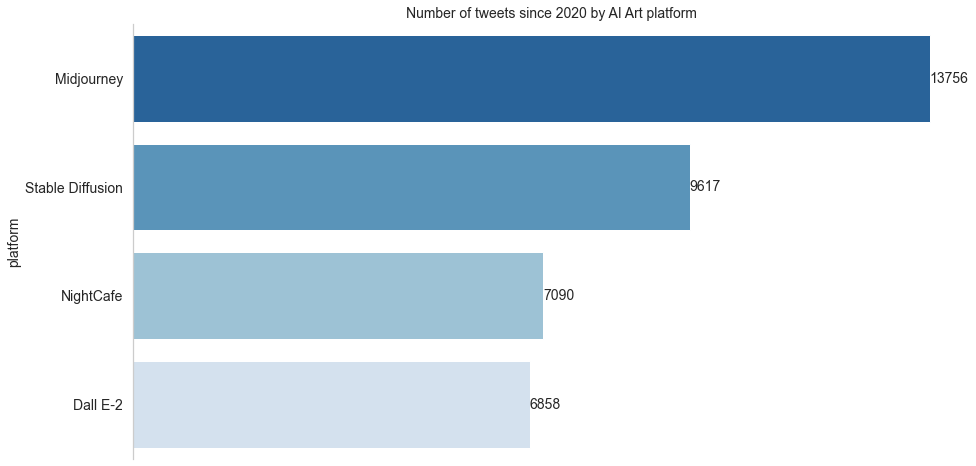

In [88]:
plt.figure(figsize=(15,8))
ax = sns.countplot(y=AI_ART_2020["platform"], order = AI_ART_2020['platform'].value_counts().index, dodge=False, palette='Blues_r');

for label in ax.containers:
    ax.bar_label(label);

ax.set(title='Number of tweets since 2020 by AI Art platform')
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().set_visible(False)

ax;

#### **2- Top 10 platforms used for publishing tweets:**

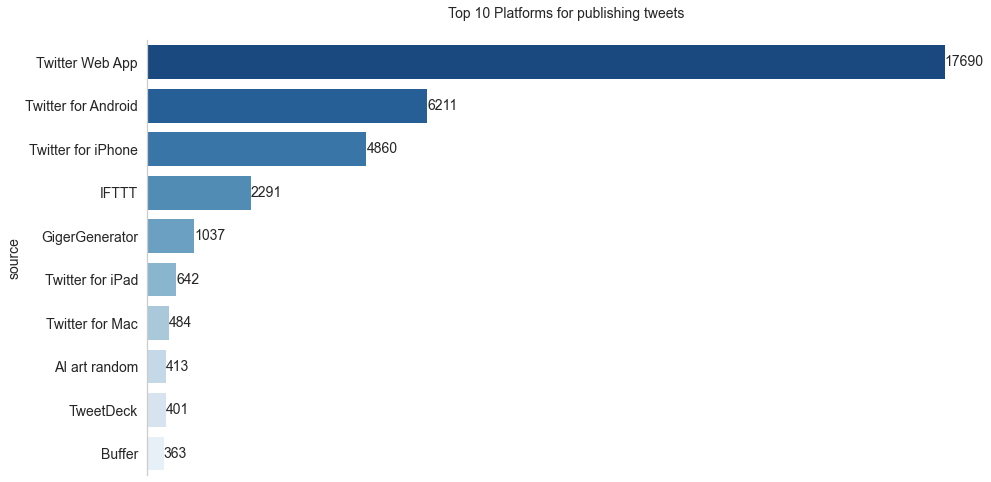

In [87]:
plt.figure(figsize=(15,8))

source_df = AI_ART_2020.groupby(['source'], as_index=False)['User'].count().sort_values(ascending=False, by='User').head(10)

ax = sns.barplot(data=source_df, y='source', x='User', palette='Blues_r')

for label in ax.containers:
    ax.bar_label(label);

ax.set(title='Top 10 Platforms for publishing tweets\n')
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().set_visible(False)

ax;

#### 47% of tweets are published using 'Twitter Web App', 16% using 'Twitter for Android' and 13% using 'Twitter for iPhone'.

#### **3- The number of tweets by AI platform for every quarter:**

In [167]:
# Let's add a column that indicates the quarter of the tweet date to our dataframe:

AI_ART_2020['quarter'] = AI_ART_2020.Date.dt.to_period('Q')

Q_df = AI_ART_2020.groupby(['platform', 'quarter'], as_index=False)['User'].count()
Q_df.sort_values('quarter', inplace=True)
Q_df

,platform,quarter,User
9,NightCafe,2020Q1,8
10,NightCafe,2020Q2,5
11,NightCafe,2020Q3,28
12,NightCafe,2020Q4,10
13,NightCafe,2021Q1,7
14,NightCafe,2021Q2,11
15,NightCafe,2021Q3,2
16,NightCafe,2021Q4,231
17,NightCafe,2022Q1,791
4,Midjourney,2022Q1,57


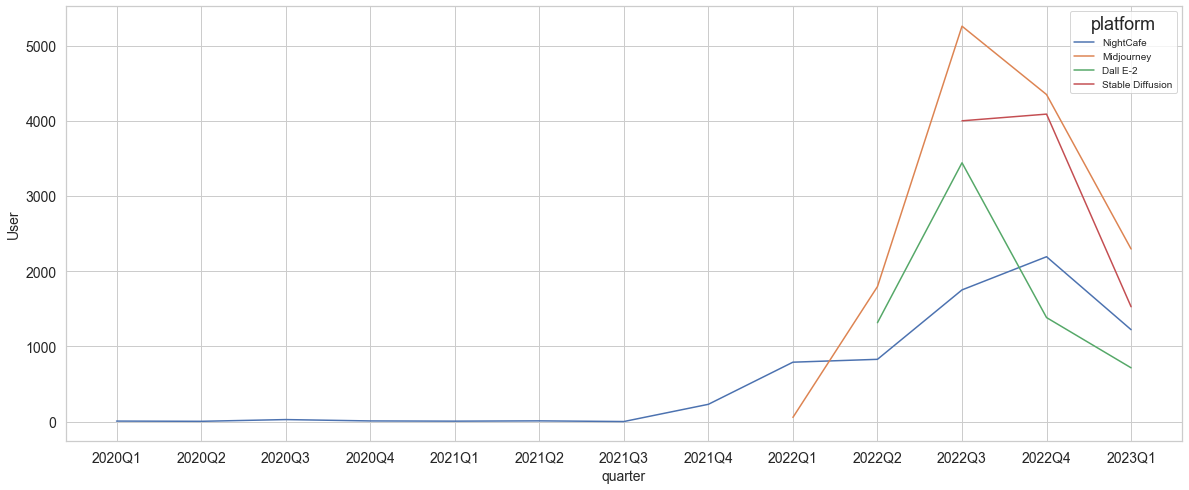

In [168]:
plt.figure(figsize=(20,8))
sns.lineplot(data=Q_df, x=Q_df['quarter'].astype('str'), y=Q_df['User'], hue=Q_df['platform']);

#### **4- How does the number of views relate to the date when the tweet was published:**

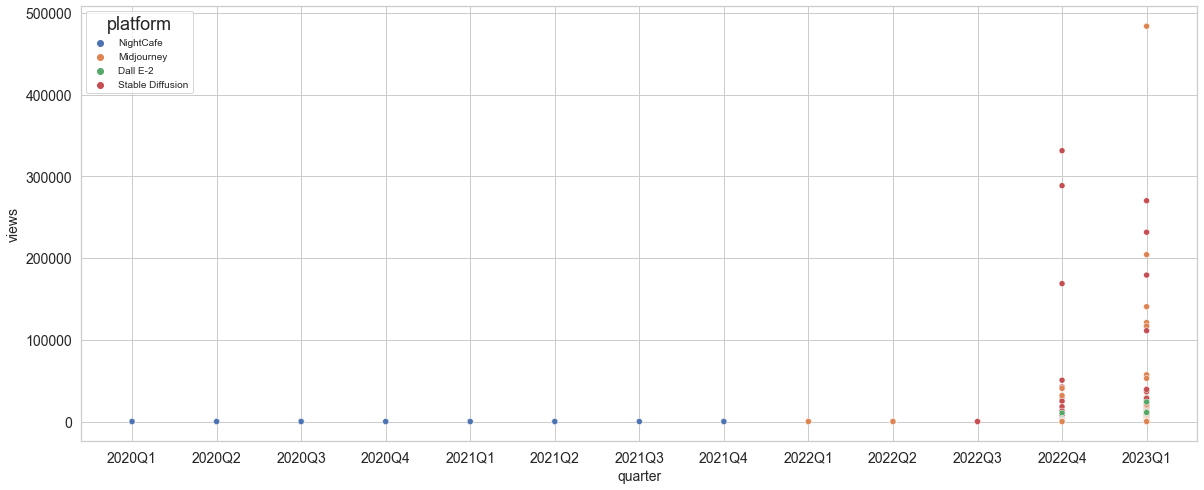

In [182]:
plt.figure(figsize=(20,8))
AI_ART_2020.sort_values(by='quarter', inplace=True)
sns.scatterplot(data=AI_ART_2020, x=AI_ART_2020.quarter.astype('str'), y='views', hue='platform', palette='deep');

#### **5- Distribution of sentiment by AI art platform:**

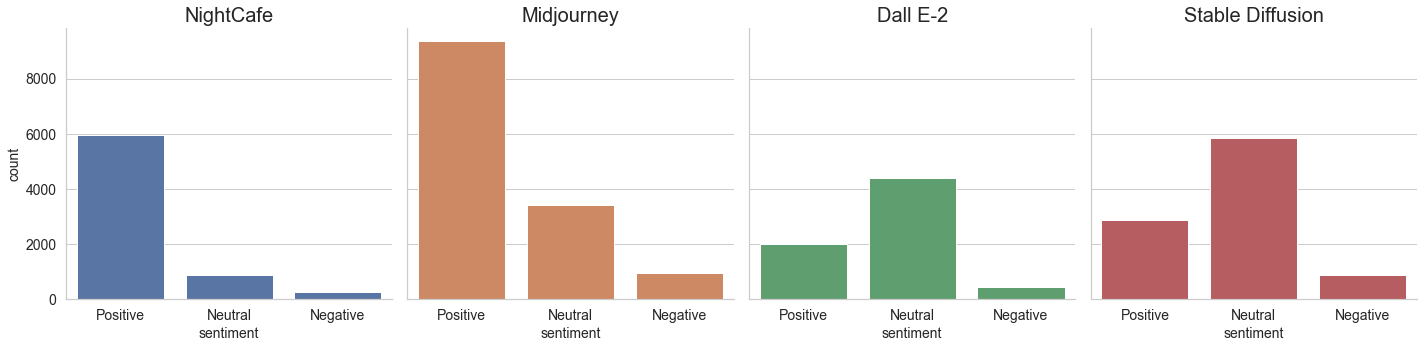

In [217]:
g = sns.FacetGrid(AI_ART_2020, col="platform", height=5, hue='platform', palette='deep');
g.map_dataframe(sns.countplot, x="sentiment");

axes = g.axes.flatten()
axes[0].set_title("NightCafe", fontsize=20);
axes[1].set_title("Midjourney", fontsize=20);
axes[2].set_title("Dall E-2", fontsize=20);
axes[3].set_title("Stable Diffusion", fontsize=20);

#### **6- Most common words that appear in the hashtags:**

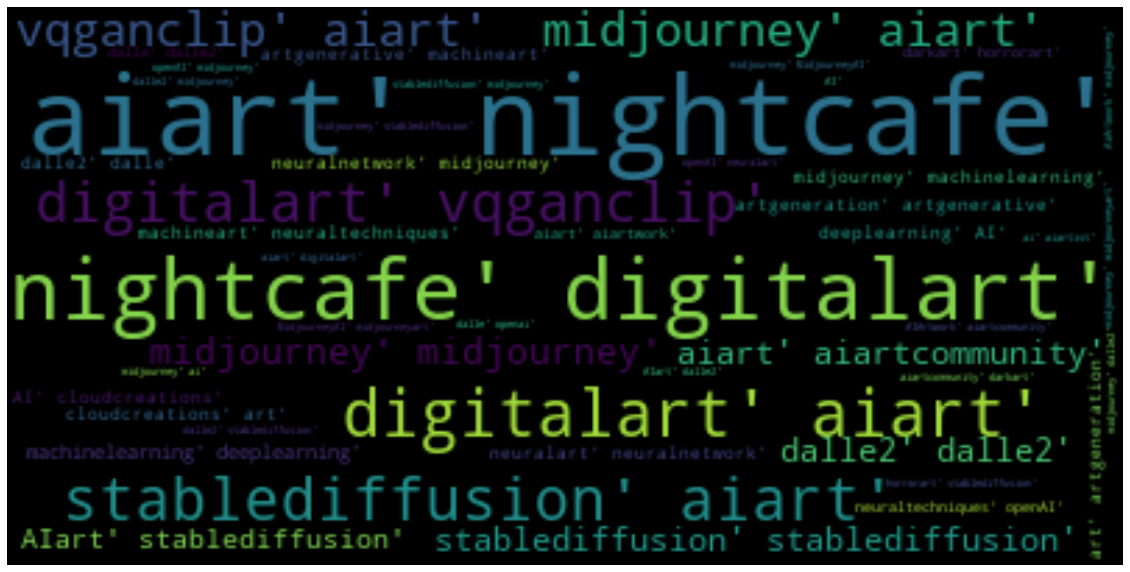

In [242]:
from wordcloud import WordCloud

# Join all of our hashtags into one string:
text = ' '.join(AI_ART_2020.hashtags)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)

# Display the generated image:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **Step 5: Tableau Dashboard**

##### We will save our AI_ART_2020 into a csv file and then go to Tableau and start designing our dashboard.

In [243]:
AI_ART_2020.to_csv('AI_ART_2020.csv')

##### A link to the Tableau dashboard will be provided in the GitHub repository.

##### Fin.